In [72]:
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [19]:
df = pd.read_csv('../data/practice/passengers.csv')
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


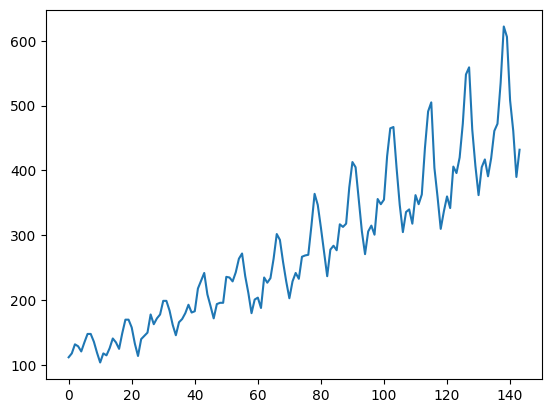

In [18]:
plt.plot(df["Passengers"])

In [22]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def adFulersTest(ts: list, name, alpha=0.05):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 'Lags Used', 'Number of observations used'])

    for key, val in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = val

    print(f"Тест \"{name}\":")
    print(dfoutput)

    if dfoutput['p-value'] < alpha:
        print(f"Значение p меньше {alpha*100.0} %. Ряд стационарный")
    else:
        print(f"Значение p меньше {alpha*100.0} %. Ряд не стационарный\n")

adFulersTest(df["Passengers"], "Пассажиры")

Тест "Пассажиры":
Test Statistics                  0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд не стационарный



In [51]:
nottrend = []

s = 6
notseason = []

for i in range(1, len(df['Passengers'])):
    nottrend.append(df['Passengers'][i] - df['Passengers'][i-1])

for i in range(s, len(df['Passengers'])):
    notseason.append(df['Passengers'][i] - df['Passengers'][i-s])

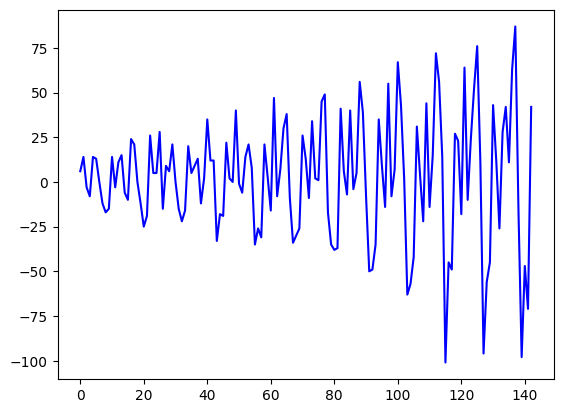

In [52]:
plt.plot(nottrend, color='blue')

In [53]:
adFulersTest(nottrend, "Пассажиры без тренда")

Тест "Пассажиры без тренда":
Test Statistics                 -2.829267
p-value                          0.054213
Lags Used                       12.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд не стационарный



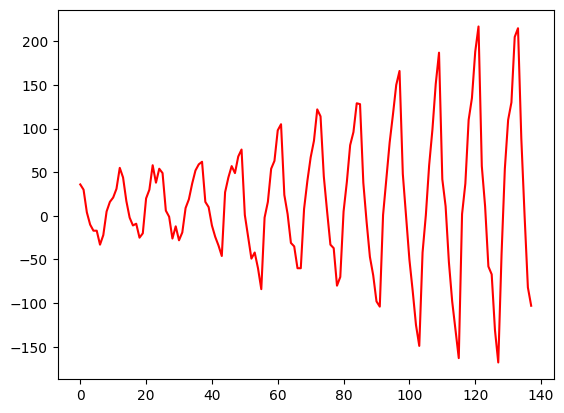

In [45]:
plt.plot(notseason, color='red')

In [54]:
adFulersTest(notseason, "Пассажиры без сезонности")

Тест "Пассажиры без сезонности":
Test Statistics                 -3.154446
p-value                          0.022778
Lags Used                        7.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


In [55]:
from scipy.stats import boxcox

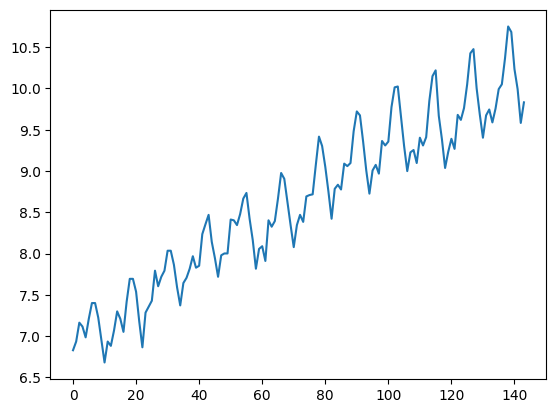

In [57]:
transformed_data, best_lambda = boxcox(df['Passengers'])

plt.plot(transformed_data)

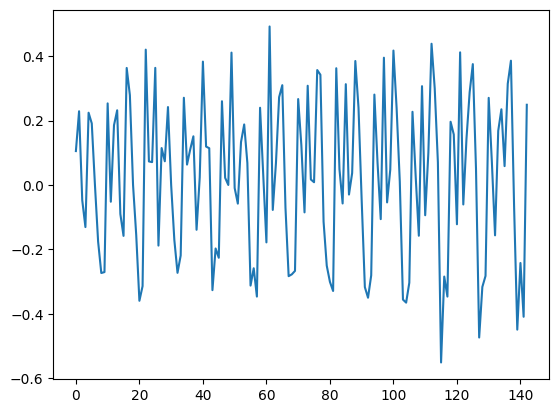

In [59]:
pnottrend = []

for i in range(1, len(transformed_data)):
    pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend)

In [60]:
adFulersTest(pnottrend, "Пассажиры без тренда boxcox")

Тест "Пассажиры без тренда boxcox":
Test Statistics                 -2.871708
p-value                          0.048738
Lags Used                       14.000000
Number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


Авторегрессия

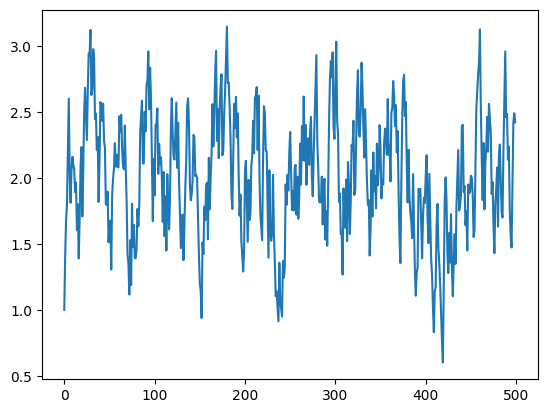

In [76]:
N = 500

arl = [1]
arlNegative = [1]

for i in range(1, N):
    arl.append(0.76 * arl[i-1] + np.random.random())
    arlNegative.append(-0.76 * arlNegative[i-1] + np.random.random())

plt.plot(arl)

In [68]:
print(f"Sd = {np.std(arl)}\nMean = {np.mean(arl)}")

Sd = 0.43404349361530237
Mean = 2.0824225840856188


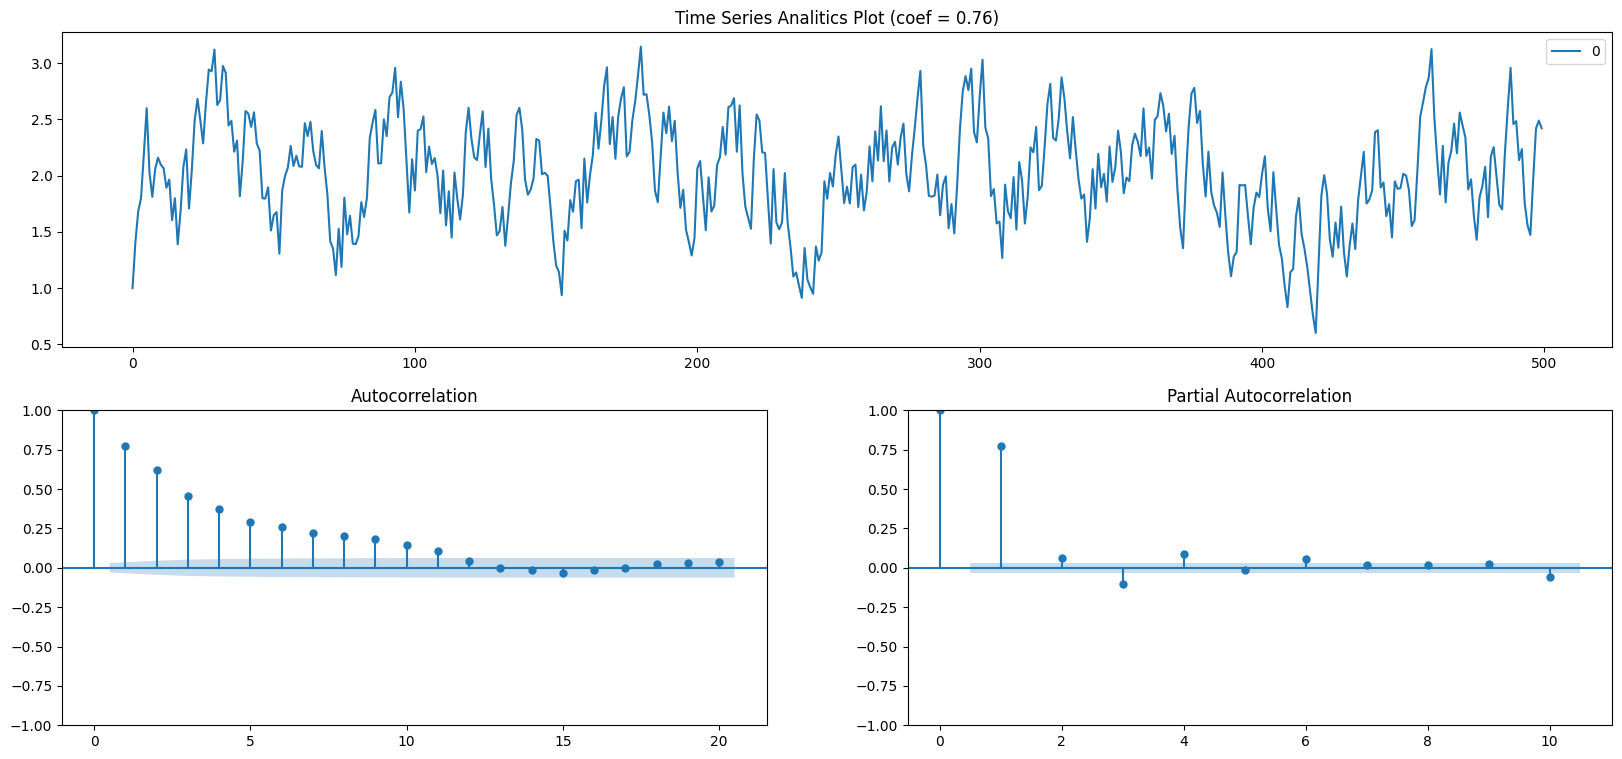

In [79]:
ts = pd.DataFrame(arl)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title("Time Series Analitics Plot (coef = 0.76)")

smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

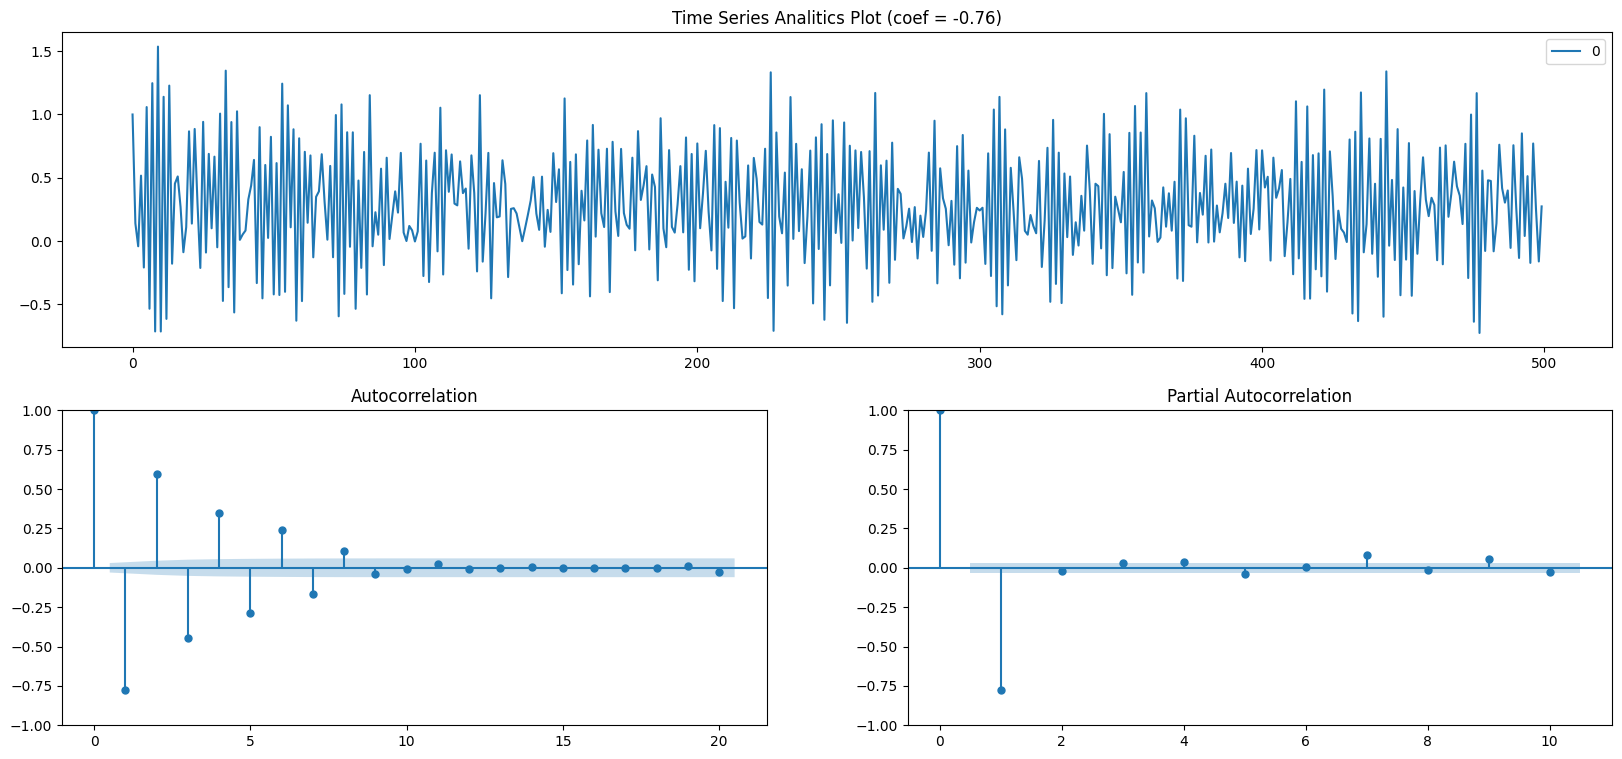

In [78]:
ts = pd.DataFrame(arlNegative)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title("Time Series Analitics Plot (coef = -0.76)")

smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None